# Importing Necessary Libraries

We start by importing all the necessary libraries that we'll need throughout this notebook. This includes libraries for data manipulation, visualization, machine learning, and metrics evaluation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import math as ma
import sklearn as sl
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix, auc 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import statsmodels.stats.api as sms
%matplotlib inline

# Loading the Dataset

Here we load the dataset for analysis and display the unique fruit names. Additionally, we clean the `fruit_name` column by stripping any leading or trailing spaces.


['  apple' ' apple' 'apple' 'mandarin' 'mandarin ' 'orange' 'lemon']
['apple' 'mandarin' 'orange' 'lemon']


<Axes: xlabel='fruit_name', ylabel='count'>

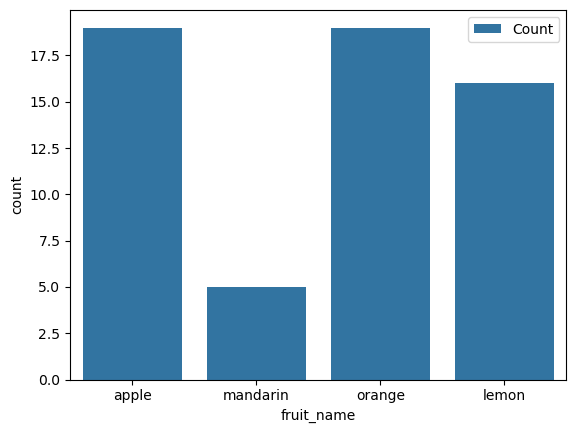

In [2]:
df = pd.read_csv('fruit.csv')
print(df['fruit_name'].unique())
df['fruit_name'] = df['fruit_name'].str.strip()
print(df['fruit_name'].unique())
sns.countplot(x='fruit_name', data=df, label="Count")


In [3]:
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


# Data Augmentation for Class 2

To balance our dataset, we increase the number of data points for class 2 to a total of 17 by adding noise to the existing data points.


In [4]:
names = ['mass', 'width', 'height', 'color_score', 'fruit_label']
df = df[names]
df_class2 = df[df['fruit_label'] == 2]

num_entries_needed = 17 - len(df_class2)
new_data = []
if num_entries_needed > 0:
    for _ in range(num_entries_needed):
        row = df_class2.sample(n=1).iloc[0]
        noisy_data = {name: row[name] + np.random.normal(0, 0.05) if name != 'fruit_label' else row[name] for name in names}
        new_data.append(noisy_data)

new_df_class2 = pd.DataFrame(new_data, columns=names)
df = pd.concat([df, new_df_class2]).reset_index(drop=True)
df.loc[df.index[-num_entries_needed:], 'fruit_label'] = 2

<Axes: xlabel='fruit_label', ylabel='count'>

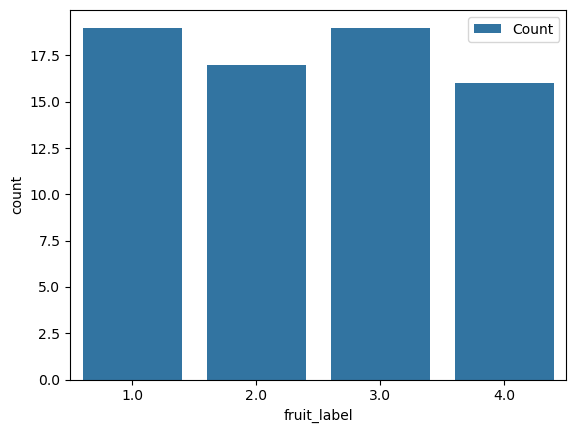

In [5]:
sns.countplot(x='fruit_label', data=df, label="Count")

# Scatter Matrix of Inputs by Class

Visualizing the relationships between different features split by fruit class.

Text(0.5, 0.98, 'Scatter-matrix of Inputs by Class')

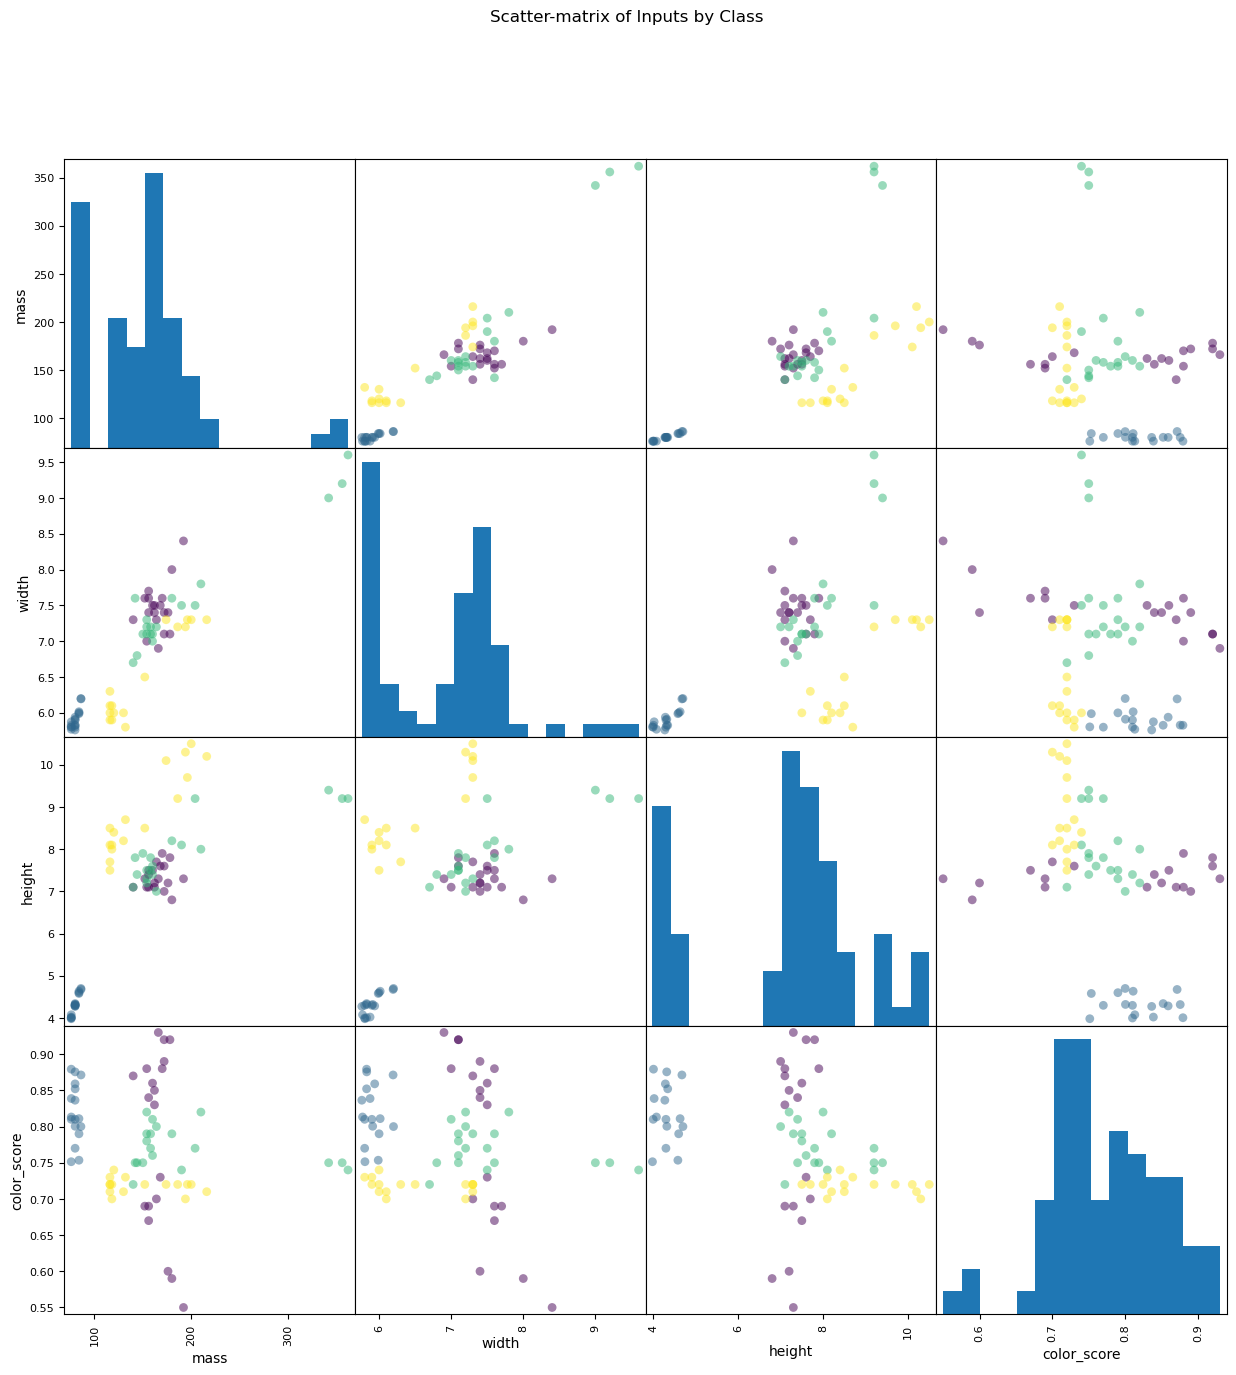

In [6]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = df[feature_names]
y = df['fruit_label']

scatter = pd.plotting.scatter_matrix(X, c=y, marker='o', s=40, hist_kwds={'bins':15}, figsize=(15,15))
plt.suptitle('Scatter-matrix of Inputs by Class')


# Principal Component Analysis (PCA)

Reducing dimensionality of the dataset to 3 principal components for visualization and modeling purposes.

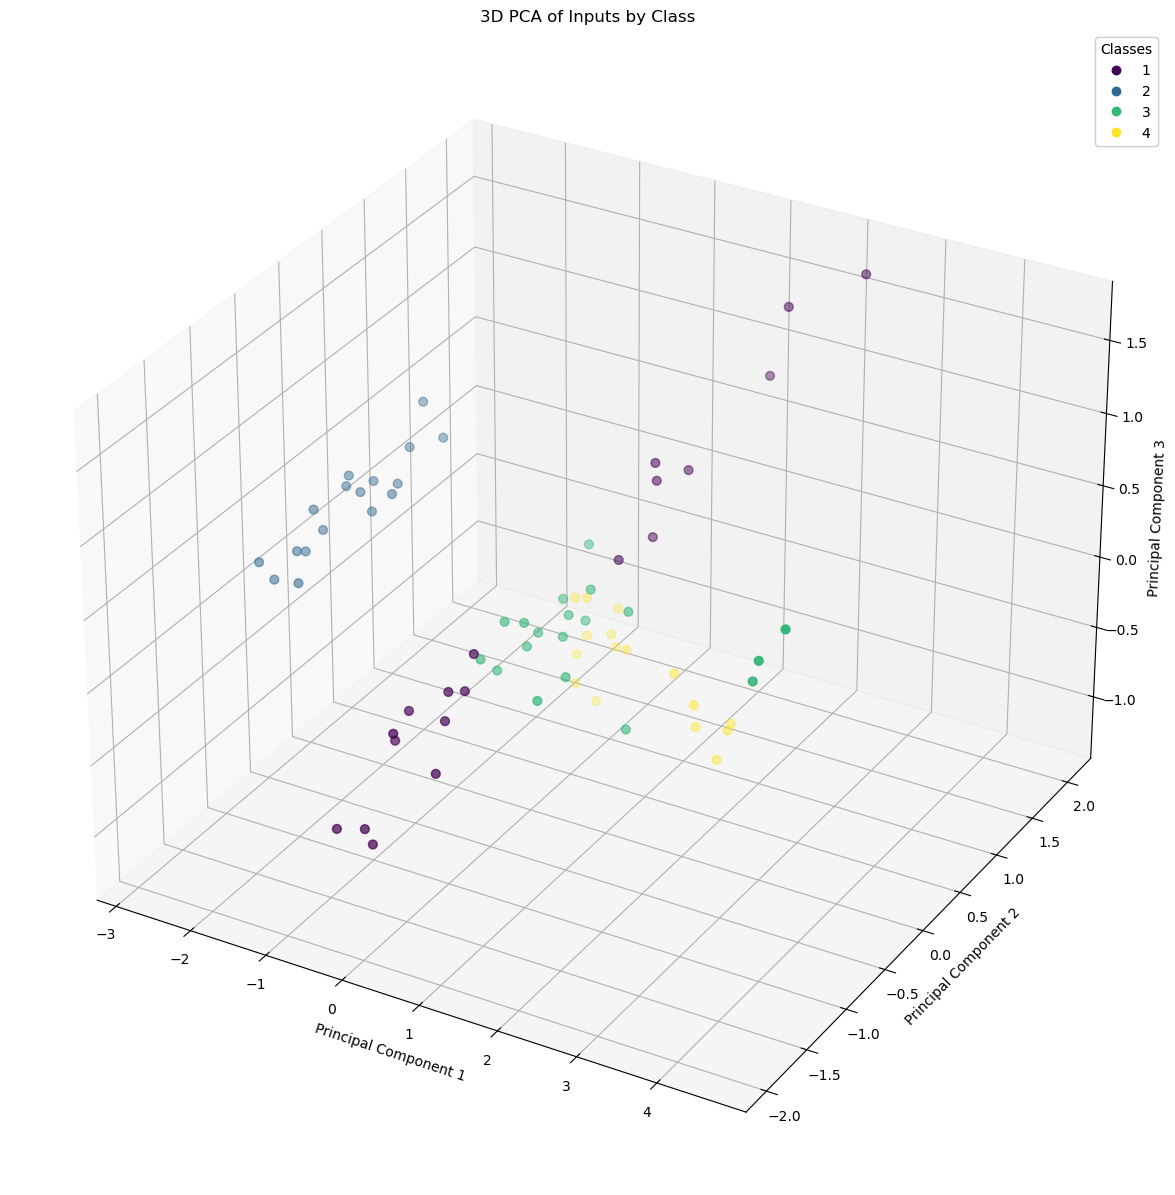

Explained Variance by the first 3 PCs: 0.98


In [7]:
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, marker='o', s=40)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Inputs by Class')
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
plt.show()
print(f"Explained Variance by the first 3 PCs: {sum(pca.explained_variance_ratio_):.2f}")

# k-Nearest Neighbors (kNN) Model Evaluation

Evaluating the k-Nearest Neighbors model performance for different values of `k` using both the training and test datasets.

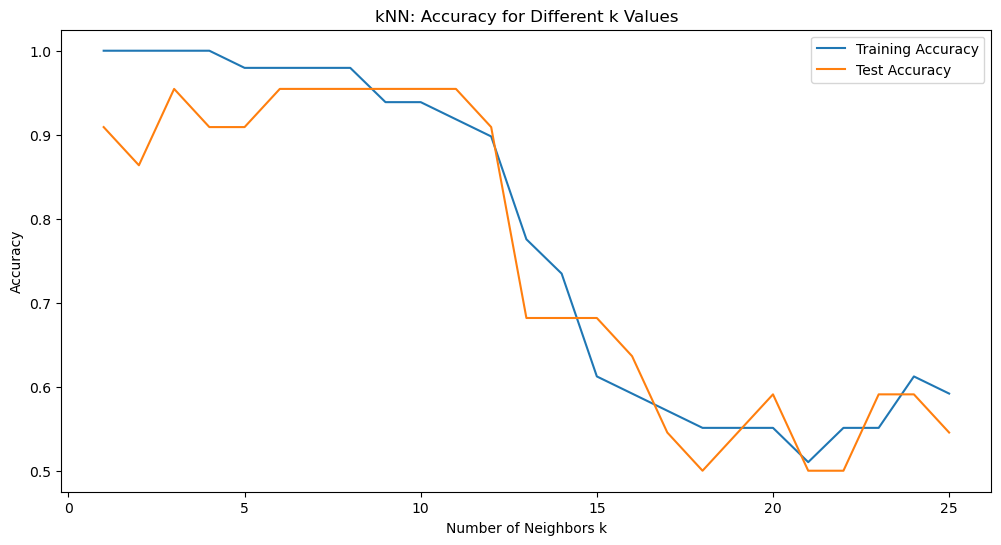

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
k_range = range(1, 26)
train_accuracy = []
test_accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(12, 6))
plt.plot(k_range, train_accuracy, label='Training Accuracy')
plt.plot(k_range, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy')
plt.title('kNN: Accuracy for Different k Values')
plt.legend()
plt.show()

# Cross-Validation to Validate `k`

Performing cross-validation to find the optimal number of neighbors `k` for the kNN model.

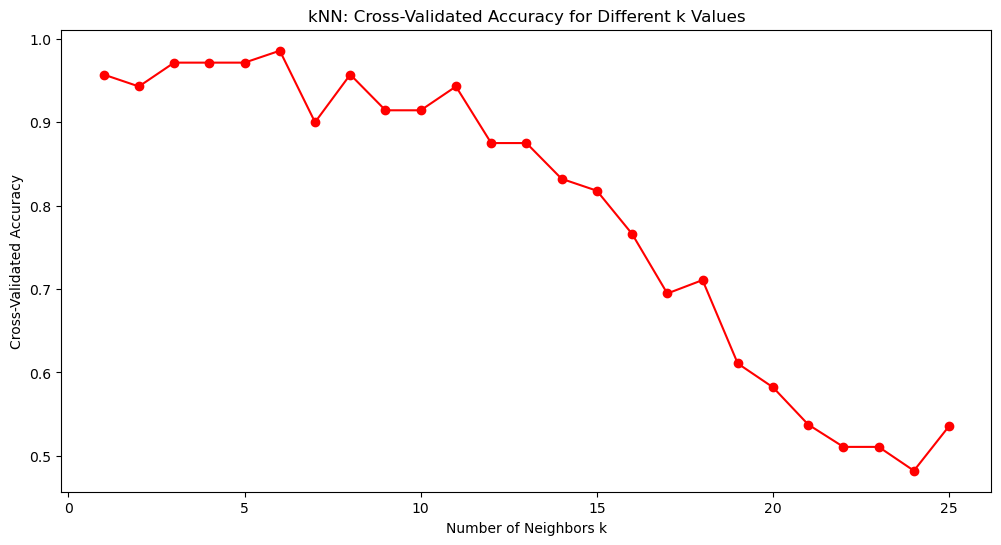

Best k based on Cross-Validation: 6


In [9]:
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_pca, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_range[cv_scores.index(max(cv_scores))]
plt.figure(figsize=(12, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validated Accuracy')
plt.title('kNN: Cross-Validated Accuracy for Different k Values')
plt.show()
print(f"Best k based on Cross-Validation: {best_k}")

# Final Model with `k=6`

Configuring and training the kNN model with the optimal number of neighbors determined by cross-validation.


In [10]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Confusion Matrices

Displaying the confusion matrices for both the training and test datasets to evaluate model performance.

In [11]:
print('Confusion matrix (Train):\n', confusion_matrix(y_train_pred, y_train))
print('Confusion matrix (Test):\n', confusion_matrix(y_test_pred, y_test))

Confusion matrix (Train):
 [[12  0  0  0]
 [ 0 13  0  0]
 [ 0  0 12  0]
 [ 0  0  1 11]]
Confusion matrix (Test):
 [[7 0 1 0]
 [0 4 0 0]
 [0 0 5 0]
 [0 0 0 5]]


# Classification Report

Generating a classification report to review precision, recall, and f1-score metrics for each class based on the test dataset.

In [12]:
print(classification_report(y_test_pred, y_test, digits=4))

              precision    recall  f1-score   support

         1.0     1.0000    0.8750    0.9333         8
         2.0     1.0000    1.0000    1.0000         4
         3.0     0.8333    1.0000    0.9091         5
         4.0     1.0000    1.0000    1.0000         5

    accuracy                         0.9545        22
   macro avg     0.9583    0.9688    0.9606        22
weighted avg     0.9621    0.9545    0.9551        22



## Conclusion

In this analysis, i utilized a comprehensive approach to classify fruits based on their physical attributes using a dataset available on Kaggle ([Fruits.csv dataset](https://www.kaggle.com/datasets/wuxi5791/fruitcsv)). The steps undertaken were methodical and based on sound machine learning practices, including Data Augmentation, Principal Component Analysis (PCA), k-Nearest Neighbors (kNN), and Cross-Validation.

### Why Data Augmentation?
I noticed early in the analysis that Class 2 was underrepresented in our dataset, with only a few data points. To address this imbalance and improve our model's ability to generalize across all classes, I employed Data Augmentation. By adding synthetic data points generated through slight modifications (adding noise) to existing ones, I increased the representation of Class 2, thereby enhancing the robustness and fairness of our classification model.

### The Role of PCA
Given the multidimensionality of our feature set, I applied PCA to reduce the dimensions to the three most informative Principal Components. This step was crucial for several reasons:
- **Visualization:** It enabled us to visually inspect the data in a 3D scatter plot, providing insights into the natural clustering of the classes.
- **Model Efficiency:** By reducing the dimensions, we improved the computational efficiency of our model without sacrificing significant information, as evidenced by the explained variance ratio.

### Choosing kNN and k=6
The kNN algorithm was chosen for its simplicity and effectiveness in classification tasks. To determine the optimal number of neighbors (`k`), I employed Cross-Validation, testing a range of values for `k`. The results indicated that `k=6` yielded the highest cross-validated accuracy, striking a balance between overfitting (too low `k`) and underfitting (too high `k`).

### Cross-Validation: A Pillar of Our Methodology
Cross-Validation was instrumental in validating our choice of `k`. By evaluating the model's performance across different subsets of the data, I ensured that the findings were not a fluke of a particular data split. This rigorous approach bolstered the confidence in the model's generalizability and performance.

### Final Model Evaluation
The culmination of my efforts was a model that achieved a remarkable accuracy of 95.45% on the test dataset. The classification report further detailed the success:
- **Class 1:** Showed high precision but slightly lower recall, indicating room for minor improvements.
- **Class 2:** Achieved perfect scores across precision, recall, and F1-score, highlighting the effectiveness of our data augmentation strategy.
- **Class 3:** While precision was lower, the perfect recall score signifies that all actual instances of Class 3 were correctly identified.
- **Class 4:** Mirrored Class 2 in achieving perfect scores, underscoring the model's robustness.

Overall, the balanced and high scores across all metrics for each class underscore the efficacy of my analytical approach. By carefully addressing data imbalances, reducing dimensionality for insight and efficiency, selecting an appropriate algorithm, and rigorously validating our choices, I developed a model that not only performs exceptionally well but also offers insights into the importance of each step in the machine learning pipeline.
